In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from datetime import timedelta, datetime
#import holidays

import matplotlib
import seaborn as sns
import pickle

In [2]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as py
import plotly.express as px

py.init_notebook_mode(connected=True)

In [3]:
matplotlib.pyplot.style.use('ggplot')
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

**Data Preview**

In [ ]:
targets_train = pd.read_csv('../../data/targets_train.csv')
uf_test = pd.read_csv('../../data/user_features_test.csv')
uf_train = pd.read_csv('../../data/user_features_train.csv')
users_test = pd.read_csv('../../data/users_test.csv')
users_train = pd.read_csv('../../data/users_train.csv')

In [6]:
users_train.shape

(878594, 11)

In [7]:
users_test.shape

(585730, 11)

In [8]:
uf_train.shape

(878594, 76)

In [9]:
uf_test.shape

(585730, 76)

In [10]:
targets_train.shape

(878594, 2)

In [6]:
df_train = pd.merge(targets_train, users_train, on='ID')

In [7]:
df_train = pd.merge(df_train, uf_train, on='ID')

In [13]:
df_train.shape

(878594, 87)

In [ ]:
df_test = pd.merge(users_test, uf_test, on='ID')

In [15]:
df_test.shape

(585730, 86)

In [16]:
df_train.head()

,ID,TARGET,first_open_date,first_open_timestamp,local_first_open_timestamp,country,platform,device_category,device_brand,device_model,has_ios_att_permission,ad_network,first_prediction,RetentionD0,RetentionD1,RetentionD2,RetentionD3,RetentionD4,RetentionD5,RetentionD6,RetentionD7,RetentionD8,RetentionD9,RetentionD10,RetentionD11,RetentionD12,RetentionD13,RetentionD14,RetentionD15,LevelAdvancedCountD0,LevelAdvancedCountD1,LevelAdvancedCountD2,LevelAdvancedCountD3,LevelAdvancedCountD4,LevelAdvancedCountD5,LevelAdvancedCountD6,LevelAdvancedCountD7,LevelAdvancedCountD8,LevelAdvancedCountD9,LevelAdvancedCountD10,LevelAdvancedCountD11,LevelAdvancedCountD12,LevelAdvancedCountD13,LevelAdvancedCountD14,LevelAdvancedCountD15,Level_1_Duration,Level_2_Duration,Level_3_Duration,Level_4_Duration,Level_5_Duration,Level_6_Duration,Level_7_Duration,Level_8_Duration,Level_9_Duration,Level_10_Duration,AdRevenueD0,AdRevenueD1,AdRevenueD2,AdRevenueD3,AdRevenueD4,AdRevenueD5,AdRevenueD6,AdRevenueD7,AdRevenueD8,AdRevenueD9,AdRevenueD10,AdRevenueD11,AdRevenueD12,AdRevenueD13,AdRevenueD14,AdRevenueD15,IAPRevenueD0,IAPRevenueD1,IAPRevenueD2,IAPRevenueD3,IAPRevenueD4,IAPRevenueD5,IAPRevenueD6,IAPRevenueD7,IAPRevenueD8,IAPRevenueD9,IAPRevenueD10,IAPRevenueD11,IAPRevenueD12,IAPRevenueD13,IAPRevenueD14,IAPRevenueD15
0,0,0.000,2024-03-02,1709355895042000,1709334295042000,Mexico,Android,mobile,Xiaomi,Redmi A2,False,unityads_int,3.314,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26.000,69.000,36.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1,0.019,2024-03-19,1710824539731000,1710806539731000,Peru,Android,mobile,Samsung,Galaxy A13,False,applovin_int,1.682,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,5,0,0,0,0,0,3,5,0,2,0,0,0,0,0,0,13.000,91.000,39.000,79.000,180.000,89.000,124.000,118.000,35.000,117.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.009,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2,0.000,2024-03-18,1710731043082000,1710720243082000,Brazil,Android,mobile,Xiaomi,Redmi 12,False,applovin_int,10.719,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.000,63.000,86.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,3,0.047,2024-03-03,1709455862260000,1709441462260000,Dominican Republic,iOS,mobile,Apple,iPhone 11 Pro Max,False,NaN,5.100,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,19,8,9,0,0,0,0,0,0,0,0,0,0,0,0,0,23.000,141.000,131.000,118.000,77.000,107.000,77.000,182.000,42.000,156.000,0.002,0.019,0.025,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,4,0.015,2024-04-30,1714482477190000,1714464477190000,Ecuador,Android,mobile,Motorola,Moto E22,False,applovin_int,2.091,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.000,52.000,30.000,84.000,139.000,96.000,268.000,97.000,44.000,122.000,0.015,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [17]:
df_test.head()

,ID,first_open_date,first_open_timestamp,local_first_open_timestamp,country,platform,device_category,device_brand,device_model,has_ios_att_permission,ad_network,first_prediction,RetentionD0,RetentionD1,RetentionD2,RetentionD3,RetentionD4,RetentionD5,RetentionD6,RetentionD7,RetentionD8,RetentionD9,RetentionD10,RetentionD11,RetentionD12,RetentionD13,RetentionD14,RetentionD15,LevelAdvancedCountD0,LevelAdvancedCountD1,LevelAdvancedCountD2,LevelAdvancedCountD3,LevelAdvancedCountD4,LevelAdvancedCountD5,LevelAdvancedCountD6,LevelAdvancedCountD7,LevelAdvancedCountD8,LevelAdvancedCountD9,LevelAdvancedCountD10,LevelAdvancedCountD11,LevelAdvancedCountD12,LevelAdvancedCountD13,LevelAdvancedCountD14,LevelAdvancedCountD15,Level_1_Duration,Level_2_Duration,Level_3_Duration,Level_4_Duration,Level_5_Duration,Level_6_Duration,Level_7_Duration,Level_8_Duration,Level_9_Duration,Level_10_Duration,AdRevenueD0,AdRevenueD1,AdRevenueD2,AdRevenueD3,AdRevenueD4,AdRevenueD5,AdRevenueD6,AdRevenueD7,AdRevenueD8,AdRevenueD9,AdRevenueD10,AdRevenueD11,AdRevenueD12,AdRevenueD13,AdRevenueD14,AdRevenueD15,IAPRevenueD0,IAPRevenueD1,IAPRevenueD2,IAPRevenueD3,IAPRevenueD4,IAPRevenueD5,IAPRevenueD6,IAPRevenueD7,IAPRevenueD8,IAPRevenueD9,IAPRevenueD10,IAPRevenueD11,IAPRevenueD12,IAPRevenueD13,IAPRevenueD14,IAPRevenueD15
0,878594,2024-05-12,1715478163668000,1715467363668000,Argentina,Android,mobile,Motorola,Moto G32,False,applovin_int,1.445,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,10,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,16.000,147.000,81.000,68.000,265.000,184.000,142.000,133.000,59.000,157.000,0.002,0.009,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,878595,2024-01-26,1706254855890000,1706233255890000,Mexico,Android,mobile,OnePlus,Nord N20 SE,False,applovin_int,9.148,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.000,209.000,84.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,878596,2024-02-13,1707778260263000,1707781860263000,France,Android,mobile,Motorola,moto g13,False,applovin_int,40.731,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.000,73.000,130.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,878597,2024-02-21,1708530744695000,1708519944695000,Brazil,Android,mobile,Samsung,Galaxy A03,False,applovin_int,4.968,True,False,False,True,False,True,True,False,True,True,False,False,False,False,False,False,2,0,0,1,0,4,13,0,2,0,0,0,0,0,0,0,66.000,896.000,562.000,840.000,412.000,1001.000,530.000,536.000,85.000,562.000,0.000,0.000,0.000,0.000,0.000,0.000,0.156,0.000,0.112,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,878598,2024-05-03,1714706093405000,1714688093405000,Peru,Android,mobile,Xiaomi,Redmi 13C,False,applovin_int,2.446,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,21,0,5,18,26,9,0,0,0,0,0,0,0,0,0,0,32.000,99.000,38.000,46.000,175.000,48.000,72.000,59.000,37.000,69.000,0.000,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
df_train.info()

In [ ]:
df_test.info()

In [20]:
df_train.describe()

,ID,TARGET,first_open_timestamp,local_first_open_timestamp,first_prediction,LevelAdvancedCountD0,LevelAdvancedCountD1,LevelAdvancedCountD2,LevelAdvancedCountD3,LevelAdvancedCountD4,LevelAdvancedCountD5,LevelAdvancedCountD6,LevelAdvancedCountD7,LevelAdvancedCountD8,LevelAdvancedCountD9,LevelAdvancedCountD10,LevelAdvancedCountD11,LevelAdvancedCountD12,LevelAdvancedCountD13,LevelAdvancedCountD14,LevelAdvancedCountD15,Level_1_Duration,Level_2_Duration,Level_3_Duration,Level_4_Duration,Level_5_Duration,Level_6_Duration,Level_7_Duration,Level_8_Duration,Level_9_Duration,Level_10_Duration,AdRevenueD0,AdRevenueD1,AdRevenueD2,AdRevenueD3,AdRevenueD4,AdRevenueD5,AdRevenueD6,AdRevenueD7,AdRevenueD8,AdRevenueD9,AdRevenueD10,AdRevenueD11,AdRevenueD12,AdRevenueD13,AdRevenueD14,AdRevenueD15,IAPRevenueD0,IAPRevenueD1,IAPRevenueD2,IAPRevenueD3,IAPRevenueD4,IAPRevenueD5,IAPRevenueD6,IAPRevenueD7,IAPRevenueD8,IAPRevenueD9,IAPRevenueD10,IAPRevenueD11,IAPRevenueD12,IAPRevenueD13,IAPRevenueD14,IAPRevenueD15
count,878594.000,878594.000,878594.000,878594.000,852859.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,872494.000,828188.000,790654.000,728697.000,686832.000,649367.000,609764.000,577358.000,559933.000,522605.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000,878594.000
mean,439296.500,0.511,1710305542815752.500,1710299336943530.250,37.612,11.127,4.750,3.174,2.521,2.123,1.863,1.691,1.577,1.380,1.247,1.166,1.098,1.037,1.008,0.977,0.903,29.842,116.582,106.351,139.051,137.652,154.479,168.807,160.801,76.040,164.556,0.101,0.047,0.029,0.022,0.018,0.016,0.014,0.013,0.011,0.010,0.009,0.008,0.008,0.008,0.008,0.007,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
std,253628.386,2.759,3554135687468.454,3553597616889.886,87.799,13.652,13.057,10.361,9.229,8.402,7.849,7.451,7.265,6.700,6.353,6.172,6.105,5.896,5.814,5.734,5.541,1493.786,210.042,190.209,246.798,248.117,240.476,285.431,246.002,681.195,250.943,0.456,0.274,0.195,0.167,0.149,0.135,0.135,0.121,0.118,0.108,0.118,0.116,0.105,0.117,0.093,0.081,0.056,0.038,0.024,0.020,0.016,0.017,0.013,0.016,0.012,0.014,0.009,0.011,0.009,0.010,0.011,0.014
min,0.000,0.000,1704056429503000.000,1704027587605000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,2.000,3.000,2.000,2.000,2.000,3.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,219648.250,0.000,1707209430364750.000,1707209128389000.000,3.933,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,11.000,37.000,40.000,51.000,49.000,62.000,70.000,68.000,40.000,77.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,439296.500,0.036,1710289045097000.000,1710280172556000.000,11.415,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.000,73.000,69.000,90.000,91.000,109.000,118.000,116.000,53.000,123.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,658944.750,0.269,1713502528776500.000,1713488410002000.000,35.876,14.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,

In [21]:
df_train.describe(include = [object])

,first_open_date,country,platform,device_category,device_brand,device_model,ad_network
count,878594,878512,878594,878594,872754,878594,568124
unique,139,221,2,2,295,4504,7
top,2024-01-31,United States,Android,mobile,Apple,iPhone 11,applovin_int
freq,10329,114723,514971,794214,363623,52461,520202


In [22]:
df_test.describe()

,ID,first_open_timestamp,local_first_open_timestamp,first_prediction,LevelAdvancedCountD0,LevelAdvancedCountD1,LevelAdvancedCountD2,LevelAdvancedCountD3,LevelAdvancedCountD4,LevelAdvancedCountD5,LevelAdvancedCountD6,LevelAdvancedCountD7,LevelAdvancedCountD8,LevelAdvancedCountD9,LevelAdvancedCountD10,LevelAdvancedCountD11,LevelAdvancedCountD12,LevelAdvancedCountD13,LevelAdvancedCountD14,LevelAdvancedCountD15,Level_1_Duration,Level_2_Duration,Level_3_Duration,Level_4_Duration,Level_5_Duration,Level_6_Duration,Level_7_Duration,Level_8_Duration,Level_9_Duration,Level_10_Duration,AdRevenueD0,AdRevenueD1,AdRevenueD2,AdRevenueD3,AdRevenueD4,AdRevenueD5,AdRevenueD6,AdRevenueD7,AdRevenueD8,AdRevenueD9,AdRevenueD10,AdRevenueD11,AdRevenueD12,AdRevenueD13,AdRevenueD14,AdRevenueD15,IAPRevenueD0,IAPRevenueD1,IAPRevenueD2,IAPRevenueD3,IAPRevenueD4,IAPRevenueD5,IAPRevenueD6,IAPRevenueD7,IAPRevenueD8,IAPRevenueD9,IAPRevenueD10,IAPRevenueD11,IAPRevenueD12,IAPRevenueD13,IAPRevenueD14,IAPRevenueD15
count,585730.000,585730.000,585730.000,568452.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,581507.000,551909.000,526981.000,485611.000,457968.000,432622.000,406469.000,385281.000,373637.000,348570.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000,585730.000
mean,1171458.500,1710307261614901.250,1710301046976073.750,37.540,11.149,4.742,3.185,2.513,2.123,1.881,1.698,1.577,1.390,1.252,1.167,1.090,1.042,1.009,0.979,0.891,28.313,116.344,106.516,139.143,138.187,154.383,168.984,161.604,75.547,164.670,0.101,0.047,0.030,0.022,0.018,0.016,0.014,0.013,0.011,0.010,0.009,0.008,0.008,0.008,0.007,0.006,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
std,169085.831,3554277034462.501,3553715170269.566,87.649,13.660,12.960,10.421,9.162,8.334,7.895,7.455,7.311,6.746,6.413,6.311,5.972,6.028,5.885,5.732,5.471,881.947,188.877,198.835,248.630,266.806,239.175,286.134,284.665,196.889,242.254,0.448,0.272,0.212,0.168,0.153,0.141,0.123,0.122,0.131,0.102,0.099,0.095,0.099,0.098,0.087,0.085,0.045,0.047,0.031,0.018,0.017,0.013,0.014,0.012,0.015,0.012,0.016,0.020,0.017,0.014,0.008,0.012
min,878594.000,1704056428261000.000,1704027979735000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,1.000,3.000,3.000,1.000,2.000,1.000,2.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1025026.250,1707210139843250.000,1707210847233000.000,3.905,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,11.000,37.000,40.000,51.000,49.000,62.000,70.000,68.000,40.000,77.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1171458.500,1710289000369000.000,1710280135727500.000,11.311,7.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.000,73.000,69.000,90.000,90.000,109.000,118.000,116.000,53.000,123.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,1317890.750,1713505194856500.000,1713493962901250.000,35.612,14.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,24.000,137.000,127.000,162.000,162

In [23]:
df_test.describe(include = [object])

,first_open_date,country,platform,device_category,device_brand,device_model,ad_network
count,585730,585674,585730,585730,581803,585730,379139
unique,139,217,2,2,251,4015,6
top,2024-01-31,United States,Android,mobile,Apple,iPhone 11,applovin_int
freq,6930,76248,344006,529800,241724,34679,347306


In [16]:
users_train.head()

,ID,first_open_date,first_open_timestamp,local_first_open_timestamp,country,platform,device_category,device_brand,device_model,has_ios_att_permission,ad_network
0,0,2024-03-02,1709355895042000,1709334295042000,Mexico,Android,mobile,Xiaomi,Redmi A2,False,unityads_int
1,1,2024-03-19,1710824539731000,1710806539731000,Peru,Android,mobile,Samsung,Galaxy A13,False,applovin_int
2,2,2024-03-18,1710731043082000,1710720243082000,Brazil,Android,mobile,Xiaomi,Redmi 12,False,applovin_int
3,3,2024-03-03,1709455862260000,1709441462260000,Dominican Republic,iOS,mobile,Apple,iPhone 11 Pro Max,False,NaN
4,4,2024-04-30,1714482477190000,1714464477190000,Ecuador,Android,mobile,Motorola,Moto E22,False,applovin_int


In [17]:
uf_train.head()

,ID,first_prediction,RetentionD0,RetentionD1,RetentionD2,RetentionD3,RetentionD4,RetentionD5,RetentionD6,RetentionD7,RetentionD8,RetentionD9,RetentionD10,RetentionD11,RetentionD12,RetentionD13,RetentionD14,RetentionD15,LevelAdvancedCountD0,LevelAdvancedCountD1,LevelAdvancedCountD2,LevelAdvancedCountD3,LevelAdvancedCountD4,LevelAdvancedCountD5,LevelAdvancedCountD6,LevelAdvancedCountD7,LevelAdvancedCountD8,LevelAdvancedCountD9,LevelAdvancedCountD10,LevelAdvancedCountD11,LevelAdvancedCountD12,LevelAdvancedCountD13,LevelAdvancedCountD14,LevelAdvancedCountD15,Level_1_Duration,Level_2_Duration,Level_3_Duration,Level_4_Duration,Level_5_Duration,Level_6_Duration,Level_7_Duration,Level_8_Duration,Level_9_Duration,Level_10_Duration,AdRevenueD0,AdRevenueD1,AdRevenueD2,AdRevenueD3,AdRevenueD4,AdRevenueD5,AdRevenueD6,AdRevenueD7,AdRevenueD8,AdRevenueD9,AdRevenueD10,AdRevenueD11,AdRevenueD12,AdRevenueD13,AdRevenueD14,AdRevenueD15,IAPRevenueD0,IAPRevenueD1,IAPRevenueD2,IAPRevenueD3,IAPRevenueD4,IAPRevenueD5,IAPRevenueD6,IAPRevenueD7,IAPRevenueD8,IAPRevenueD9,IAPRevenueD10,IAPRevenueD11,IAPRevenueD12,IAPRevenueD13,IAPRevenueD14,IAPRevenueD15
0,0,3.314,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26.000,69.000,36.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1,1.682,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,5,0,0,0,0,0,3,5,0,2,0,0,0,0,0,0,13.000,91.000,39.000,79.000,180.000,89.000,124.000,118.000,35.000,117.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.009,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2,10.719,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.000,63.000,86.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,3,5.100,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,19,8,9,0,0,0,0,0,0,0,0,0,0,0,0,0,23.000,141.000,131.000,118.000,77.000,107.000,77.000,182.000,42.000,156.000,0.002,0.019,0.025,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,4,2.091,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.000,52.000,30.000,84.000,139.000,96.000,268.000,97.000,44.000,122.000,0.015,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [18]:
uf_train[['ID', 'first_prediction']].head()

,ID,first_prediction
0,0,3.314
1,1,1.682
2,2,10.719
3,3,5.100
4,4,2.091


In [8]:
users_train = pd.merge(users_train, uf_train[['ID', 'first_prediction']], on='ID')

In [20]:
users_train.head()

,ID,first_open_date,first_open_timestamp,local_first_open_timestamp,country,platform,device_category,device_brand,device_model,has_ios_att_permission,ad_network,first_prediction
0,0,2024-03-02,1709355895042000,1709334295042000,Mexico,Android,mobile,Xiaomi,Redmi A2,False,unityads_int,3.314
1,1,2024-03-19,1710824539731000,1710806539731000,Peru,Android,mobile,Samsung,Galaxy A13,False,applovin_int,1.682
2,2,2024-03-18,1710731043082000,1710720243082000,Brazil,Android,mobile,Xiaomi,Redmi 12,False,applovin_int,10.719
3,3,2024-03-03,1709455862260000,1709441462260000,Dominican Republic,iOS,mobile,Apple,iPhone 11 Pro Max,False,NaN,5.100
4,4,2024-04-30,1714482477190000,1714464477190000,Ecuador,Android,mobile,Motorola,Moto E22,False,applovin_int,2.091


<Axes: >

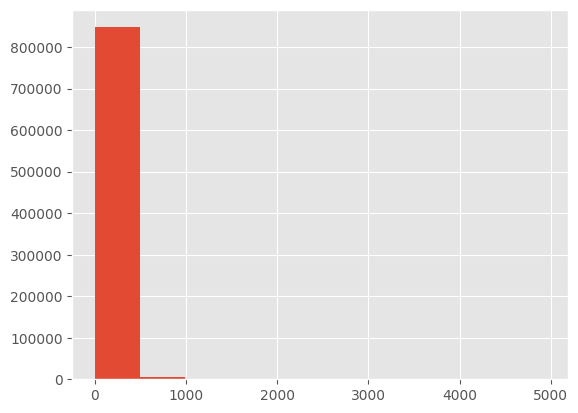

In [21]:
users_train['first_prediction'].hist()

In [9]:
users_train['first_prediction'].describe()

count    852859.000000
mean         37.612360
std          87.799145
min           0.000100
25%           3.932556
50%          11.414559
75%          35.876447
max        4944.476604
Name: first_prediction, dtype: float64

In [ ]:
users_train['first_prediction'].value_counts()

In [30]:
len(users_train['first_prediction'].value_counts())

600104

In [11]:
len(users_train['first_prediction'].value_counts())

600104

In [16]:
users_train[round(users_train['first_prediction'], 3) == 63.000].head()

,ID,first_open_date,first_open_timestamp,local_first_open_timestamp,country,platform,device_category,device_brand,device_model,has_ios_att_permission,ad_network,first_prediction
10,10,2024-02-06,1707168810317000,1707140010317000,United States,iOS,mobile,Apple,iPhone SE (2nd generation),True,applovin_int,63.000
12,12,2024-05-04,1714783839460000,1714791039460000,Germany,iOS,mobile,Apple,iPhone 14 Pro Max,False,applovin_int,63.000
18,18,2024-04-07,1712496449028000,1712503649028000,Germany,iOS,mobile,Apple,iPhone 13 Pro,False,NaN,63.000
73,73,2024-02-05,1707111246281000,1707089646281000,United States,iOS,mobile,Apple,iPhone 14,False,applovin_int,63.000
74,74,2024-03-13,1710355294824000,1710340894824000,United States,iOS,tablet,Apple,iPad Pro (11-inch),False,applovin_int,63.000


In [ ]:
users_train['device_brand'].value_counts()

In [31]:
len(users_train['device_brand'].value_counts())

295

In [32]:
600104/295

2034.250847457627

In [17]:
users_train[round(users_train['first_prediction'], 3) == 63.000]['device_brand'].value_counts()

device_brand
Apple       15177
Samsung        22
Xiaomi          5
Motorola        4
OPPO            2
Vortex          1
Vivo            1
Honor           1
Lenovo          1
OnePlus         1
Teclast         1
Google          1
Name: count, dtype: int64

In [ ]:
users_train[(round(users_train['first_prediction'], 3) == 63.000) & (users_train['device_brand']=='Samsung')]

In [19]:
users_train[round(users_train['first_prediction'], 3) == 95.000].head()

,ID,first_open_date,first_open_timestamp,local_first_open_timestamp,country,platform,device_category,device_brand,device_model,has_ios_att_permission,ad_network,first_prediction
85,85,2024-02-24,1708739165782000,1708739165782000,United Kingdom,iOS,mobile,Apple,iPhone 14,True,applovin_int,95.000
122,122,2024-01-27,1706324091016000,1706302491016000,United States,iOS,mobile,Apple,iPhone 11 Pro Max,False,NaN,95.000
139,139,2024-04-10,1712724552247000,1712710152247000,United States,iOS,mobile,Apple,iPhone 14,False,applovin_int,95.000
145,145,2024-03-02,1709347569079000,1709325969079000,United States,iOS,mobile,Apple,iPhone 13 Pro Max,False,NaN,95.000
248,248,2024-03-04,1709518448518000,1709496848518000,United States,iOS,mobile,Apple,iPhone 14,False,NaN,95.000


In [20]:
users_train[round(users_train['first_prediction'], 3) == 95.000]['device_brand'].value_counts()

device_brand
Apple        14311
Samsung         48
Motorola         9
Xiaomi           7
OPPO             4
Honor            3
Realme           2
Google           2
ZTE              1
DOOGEE           1
Huawei           1
Oukitel          1
OnePlus          1
Lenovo           1
Blackview        1
Nokia            1
Teclast          1
T-Mobile         1
Name: count, dtype: int64

In [ ]:
users_train[(round(users_train['first_prediction'], 3) == 95.000) & (users_train['device_brand']=='Samsung')]

In [ ]:
users_train[(round(users_train['first_prediction'], 3) == 95.000) & (users_train['device_brand']=='Apple')]['country'].value_counts()

<Axes: >

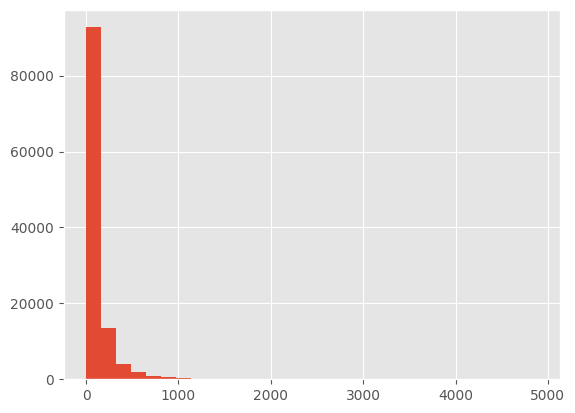

In [27]:
users_train[users_train['country'] == 'United States']['first_prediction'].hist(bins=30)

In [32]:
users_train[round(users_train['first_prediction'], 3) >= 1000.00].describe()

,ID,first_open_timestamp,local_first_open_timestamp,first_prediction
count,747.000,747.000,747.000,747.000
mean,439020.293,1712676269000194.000,1712662271409832.500,1513.924
std,254430.071,2754806754755.997,2754930173034.972,733.111
min,983.000,1704154894867000.000,1704136894867000.000,1000.000
25%,216537.500,1711044871888500.000,1711052938277000.000,1096.115
50%,435979.000,1713582583653000.000,1713563230789000.000,1243.278
75%,668802.500,1714684861071000.000,1714670461071000.000,1546.046
max,877418.000,1716052581510000.000,1716038181510000.000,4944.477


In [ ]:
users_train[round(users_train['first_prediction'], 3) >= 2800.00]

<Axes: >

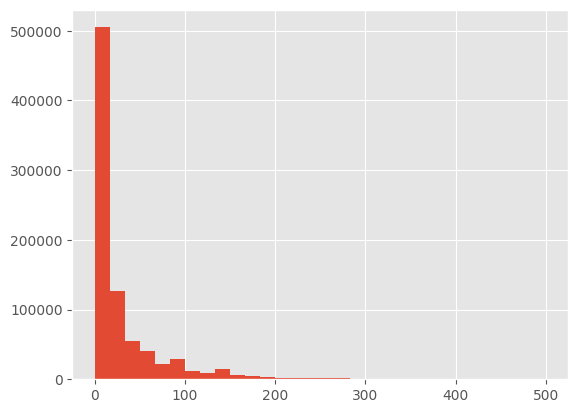

In [34]:
users_train[round(users_train['first_prediction'], 3) <= 500.00]['first_prediction'].hist(bins=30)

In [36]:
users_train['log_first_prediction'] = np.log(users_train['first_prediction'])

<Axes: >

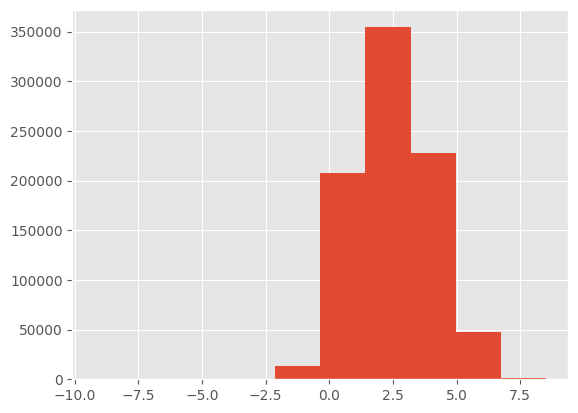

In [37]:
users_train['log_first_prediction'].hist()

In [ ]:
users_train[(0.0 <= round(users_train['log_first_prediction'], 1)) & (round(users_train['log_first_prediction'], 1) <= 5.000)]['device_brand'].value_counts()

In [ ]:
users_train[(0.0 > round(users_train['log_first_prediction'], 1)) & (users_train['device_brand'] == 'Apple')]['device_model'].value_counts()

In [74]:
df_train['Level_2_Duration'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 878594 entries, 0 to 878593
Series name: Level_2_Duration
Non-Null Count   Dtype  
--------------   -----  
828188 non-null  float64
dtypes: float64(1)
memory usage: 6.7 MB


In [14]:
LvlDuration_cols = ['Level_1_Duration', 'Level_2_Duration', 'Level_3_Duration', 'Level_4_Duration', 'Level_5_Duration', 
                   'Level_6_Duration', 'Level_7_Duration', 'Level_8_Duration', 'Level_9_Duration', 'Level_10_Duration']

In [15]:
df_train[LvlDuration_cols] = df_train[LvlDuration_cols].fillna(0.0)

In [33]:
df_train.head()

,ID,TARGET,first_open_date,first_open_timestamp,local_first_open_timestamp,country,platform,device_category,device_brand,device_model,has_ios_att_permission,ad_network,first_prediction,RetentionD0,RetentionD1,RetentionD2,RetentionD3,RetentionD4,RetentionD5,RetentionD6,RetentionD7,RetentionD8,RetentionD9,RetentionD10,RetentionD11,RetentionD12,RetentionD13,RetentionD14,RetentionD15,LevelAdvancedCountD0,LevelAdvancedCountD1,LevelAdvancedCountD2,LevelAdvancedCountD3,LevelAdvancedCountD4,LevelAdvancedCountD5,LevelAdvancedCountD6,LevelAdvancedCountD7,LevelAdvancedCountD8,LevelAdvancedCountD9,LevelAdvancedCountD10,LevelAdvancedCountD11,LevelAdvancedCountD12,LevelAdvancedCountD13,LevelAdvancedCountD14,LevelAdvancedCountD15,Level_1_Duration,Level_2_Duration,Level_3_Duration,Level_4_Duration,Level_5_Duration,Level_6_Duration,Level_7_Duration,Level_8_Duration,Level_9_Duration,Level_10_Duration,AdRevenueD0,AdRevenueD1,AdRevenueD2,AdRevenueD3,AdRevenueD4,AdRevenueD5,AdRevenueD6,AdRevenueD7,AdRevenueD8,AdRevenueD9,AdRevenueD10,AdRevenueD11,AdRevenueD12,AdRevenueD13,AdRevenueD14,AdRevenueD15,IAPRevenueD0,IAPRevenueD1,IAPRevenueD2,IAPRevenueD3,IAPRevenueD4,IAPRevenueD5,IAPRevenueD6,IAPRevenueD7,IAPRevenueD8,IAPRevenueD9,IAPRevenueD10,IAPRevenueD11,IAPRevenueD12,IAPRevenueD13,IAPRevenueD14,IAPRevenueD15,log_first_prediction,economic_class,log_TARGET,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_AdRevenueD0_3,Total_AdRevenueD4_7,Total_AdRevenueD8_11,Total_AdRevenueD12_15,Total_IAPRevenueD0_3,Total_IAPRevenueD4_7,Total_IAPRevenueD8_11,Total_IAPRevenueD12_15
0,0,0.000,2024-03-02,1709355895042000,1709334295042000,Mexico,Android,mobile,Xiaomi,Redmi A2,False,unityads_int,3.314,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26.000,69.000,36.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.198,middle_class,-6.908,1,0,0,1,0.750,0.000,0.000,0.000,43.667,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1,0.019,2024-03-19,1710824539731000,1710806539731000,Peru,Android,mobile,Samsung,Galaxy A13,False,applovin_int,1.682,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,5,0,0,0,0,0,3,5,0,2,0,0,0,0,0,0,13.000,91.000,39.000,79.000,180.000,89.000,124.000,118.000,35.000,117.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.009,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.520,middle_class,-3.917,1,2,1,0,1.250,2.000,0.500,0.000,47.667,118.000,90.000,0.000,0.009,0.010,0.000,0.000,0.000,0.000,0.000
2,2,0.000,2024-03-18,1710731043082000,1710720243082000,Brazil,Android,mobile,Xiaomi,Redmi 12,False,applovin_int,10.719,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.000,63.000,86.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.372,middle_class,-6.908,1,0,0,0,0.750,0.000,0.000,0.000,52.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,3,0.047,2024-03-03,1709455862260000,1709441462260000,Dominican Republic,iOS,mobile,Apple,iPhone 11 Pro Max,False,NaN,5.100,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,19,8,9,0,0,0,0,0,0,0,0,0,0,0,0,0,23.000,141.000,131.000,118.000,77.000,107.000,77.000,182.000,42.000,156.000,0.002,0.019,0.025,0.000,0.000,0.000

In [16]:
df_train['Retention_count_D0_3'] = (df_train['RetentionD0'].astype(int) + df_train['RetentionD1'].astype(int) + 
                                        df_train['RetentionD2'].astype(int) + df_train['RetentionD3'].astype(int))

In [17]:
df_train['Retention_count_D4_7'] = (df_train['RetentionD4'].astype(int) + df_train['RetentionD5'].astype(int) + 
                                        df_train['RetentionD6'].astype(int) + df_train['RetentionD7'].astype(int))

df_train['Retention_count_D8_11'] = (df_train['RetentionD8'].astype(int) + df_train['RetentionD9'].astype(int) + 
                                        df_train['RetentionD10'].astype(int) + df_train['RetentionD11'].astype(int))

df_train['Retention_count_D12_15'] = (df_train['RetentionD12'].astype(int) + df_train['RetentionD13'].astype(int) + 
                                        df_train['RetentionD14'].astype(int) + df_train['RetentionD15'].astype(int))

In [18]:
df_train['Avg_Lvl_Count_D0_3'] = (df_train['LevelAdvancedCountD0'] + df_train['LevelAdvancedCountD1'] +
                                 df_train['LevelAdvancedCountD2'] + df_train['LevelAdvancedCountD3']) / 4.0

In [19]:
df_train['Avg_Lvl_Count_D4_7'] = (df_train['LevelAdvancedCountD4'] + df_train['LevelAdvancedCountD5'] +
                                 df_train['LevelAdvancedCountD6'] + df_train['LevelAdvancedCountD7']) / 4.0

df_train['Avg_Lvl_Count_D8_11'] = (df_train['LevelAdvancedCountD8'] + df_train['LevelAdvancedCountD9'] +
                                 df_train['LevelAdvancedCountD10'] + df_train['LevelAdvancedCountD11']) / 4.0

df_train['Avg_Lvl_Count_D12_15'] = (df_train['LevelAdvancedCountD12'] + df_train['LevelAdvancedCountD13'] +
                                 df_train['LevelAdvancedCountD14'] + df_train['LevelAdvancedCountD15']) / 4.0

In [20]:
df_train['Avg_Duration_Lvl0_3'] = (df_train['Level_1_Duration'] + df_train['Level_2_Duration'] +
                                 df_train['Level_3_Duration']) / 3.0

df_train['Avg_Duration_Lvl4_7'] = (df_train['Level_4_Duration'] + df_train['Level_5_Duration'] +
                                 df_train['Level_6_Duration'] + df_train['Level_7_Duration']) / 4.0

df_train['Avg_Duration_Lvl8_10'] = (df_train['Level_8_Duration'] + df_train['Level_9_Duration'] +
                                 df_train['Level_10_Duration']) / 3.0

In [21]:
df_train['Total_AdRevenueD0_3'] = (df_train['AdRevenueD0'] + df_train['AdRevenueD1'] + 
                                        df_train['AdRevenueD2'] + df_train['AdRevenueD3'])

df_train['Total_AdRevenueD4_7'] = (df_train['AdRevenueD4'] + df_train['AdRevenueD5'] + 
                                        df_train['AdRevenueD6'] + df_train['AdRevenueD7'])

df_train['Total_AdRevenueD8_11'] = (df_train['AdRevenueD8'] + df_train['AdRevenueD9'] + 
                                        df_train['AdRevenueD10'] + df_train['AdRevenueD11'])

df_train['Total_AdRevenueD12_15'] = (df_train['AdRevenueD12'] + df_train['AdRevenueD13'] + 
                                        df_train['AdRevenueD14'] + df_train['AdRevenueD15'])

In [22]:
df_train['Total_IAPRevenueD0_3'] = (df_train['IAPRevenueD0'] + df_train['IAPRevenueD1'] + 
                                        df_train['IAPRevenueD2'] + df_train['IAPRevenueD3'])

df_train['Total_IAPRevenueD4_7'] = (df_train['IAPRevenueD4'] + df_train['IAPRevenueD5'] + 
                                        df_train['IAPRevenueD6'] + df_train['IAPRevenueD7'])

df_train['Total_IAPRevenueD8_11'] = (df_train['IAPRevenueD8'] + df_train['IAPRevenueD9'] + 
                                        df_train['IAPRevenueD10'] + df_train['IAPRevenueD11'])

df_train['Total_IAPRevenueD12_15'] = (df_train['IAPRevenueD12'] + df_train['IAPRevenueD13'] + 
                                        df_train['IAPRevenueD14'] + df_train['IAPRevenueD15'])

In [23]:
df_train = df_train[['ID', 'TARGET', 'first_open_date', 'first_prediction', 'log_first_prediction', 'economic_class', 'log_TARGET',
         'Retention_count_D0_3', 'Retention_count_D4_7', 'Retention_count_D8_11', 'Retention_count_D12_15',
         'Avg_Lvl_Count_D0_3', 'Avg_Lvl_Count_D4_7', 'Avg_Lvl_Count_D8_11', 'Avg_Lvl_Count_D12_15', 'Avg_Duration_Lvl0_3',
         'Avg_Duration_Lvl4_7', 'Avg_Duration_Lvl8_10', 'Total_AdRevenueD0_3', 'Total_AdRevenueD4_7', 'Total_AdRevenueD8_11', 
         'Total_AdRevenueD12_15', 'Total_IAPRevenueD0_3', 'Total_IAPRevenueD4_7', 'Total_IAPRevenueD8_11', 'Total_IAPRevenueD12_15']]

In [24]:
df_train['Total_AdRevenue'] = df_train['Total_AdRevenueD0_3'] + df_train['Total_AdRevenueD4_7'] + df_train['Total_AdRevenueD8_11'] + df_train['Total_AdRevenueD12_15']

df_train['Total_IAPRevenue'] = df_train['Total_IAPRevenueD0_3'] + df_train['Total_IAPRevenueD4_7'] + df_train['Total_IAPRevenueD8_11'] + df_train['Total_IAPRevenueD12_15']


In [25]:
df_train.head()

,ID,TARGET,first_open_date,first_prediction,log_first_prediction,economic_class,log_TARGET,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_AdRevenueD0_3,Total_AdRevenueD4_7,Total_AdRevenueD8_11,Total_AdRevenueD12_15,Total_IAPRevenueD0_3,Total_IAPRevenueD4_7,Total_IAPRevenueD8_11,Total_IAPRevenueD12_15,Total_AdRevenue,Total_IAPRevenue
0,0,0.000,2024-03-02,3.314,1.198,middle_class,-6.908,1,0,0,1,0.750,0.000,0.000,0.000,43.667,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,1,0.019,2024-03-19,1.682,0.520,middle_class,-3.917,1,2,1,0,1.250,2.000,0.500,0.000,47.667,118.000,90.000,0.000,0.009,0.010,0.000,0.000,0.000,0.000,0.000,0.019,0.000
2,2,0.000,2024-03-18,10.719,2.372,middle_class,-6.908,1,0,0,0,0.750,0.000,0.000,0.000,52.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,3,0.047,2024-03-03,5.100,1.629,middle_class,-3.044,3,0,0,0,9.000,0.000,0.000,0.000,98.333,94.750,126.667,0.047,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.047,0.000
4,4,0.015,2024-04-30,2.091,0.738,middle_class,-4.155,1,0,0,0,3.750,0.000,0.000,0.000,30.000,146.750,87.667,0.015,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.015,0.000


In [49]:
df_train[(round(df_train['log_TARGET'], 1) <= -6.0)].head(20)

,ID,TARGET,first_open_date,first_prediction,log_first_prediction,economic_class,log_TARGET,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_AdRevenueD0_3,Total_AdRevenueD4_7,Total_AdRevenueD8_11,Total_AdRevenueD12_15,Total_IAPRevenueD0_3,Total_IAPRevenueD4_7,Total_IAPRevenueD8_11,Total_IAPRevenueD12_15,Total_AdRevenue,Total_IAPRevenue
0,0,0.000,2024-03-02,3.314,1.198,middle_class,-6.908,1,0,0,1,0.750,0.000,0.000,0.000,43.667,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2,0.000,2024-03-18,10.719,2.372,middle_class,-6.908,1,0,0,0,0.750,0.000,0.000,0.000,52.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,5,0.000,2024-04-23,1.667,0.512,middle_class,-6.908,3,0,0,0,0.750,0.000,0.000,0.000,200.667,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,6,0.000,2024-03-30,0.600,-0.509,poor,-6.908,2,0,0,0,1.500,0.000,0.000,0.000,97.333,95.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,9,0.000,2024-03-20,NaN,NaN,Nan,-6.908,2,0,0,0,4.500,0.000,0.000,0.000,30.667,51.000,61.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
11,11,0.000,2024-02-26,35.504,3.570,middle_class,-6.908,2,0,0,0,1.250,0.000,0.000,0.000,41.667,74.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16,16,0.000,2024-05-16,4.059,1.401,middle_class,-6.908,1,0,0,0,1.750,0.000,0.000,0.000,123.333,436.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
18,18,0.000,2024-04-07,63.000,4.143,middle_class,-6.908,1,0,0,0,1.750,0.000,0.000,0.000,20.333,59.750,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
22,22,0.000,2024-03-09,2.850,1.048,middle_class,-6.908,1,0,0,0,0.750,0.000,0.000,0.000,48.667,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
23,23,0.000,2024-02-14,31.000,3.434,middle_class,-6.908,1,0,0,0,0.250,0.000,0.000,0.000,6.667,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [50]:
df_train[(round(df_train['log_TARGET'], 2) < -6.00)].describe()

,ID,TARGET,first_prediction,log_first_prediction,log_TARGET,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_AdRevenueD0_3,Total_AdRevenueD4_7,Total_AdRevenueD8_11,Total_AdRevenueD12_15,Total_IAPRevenueD0_3,Total_IAPRevenueD4_7,Total_IAPRevenueD8_11,Total_IAPRevenueD12_15,Total_AdRevenue,Total_IAPRevenue
count,295173.000,295173.000,271112.000,271112.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000,295173.000
mean,439633.745,0.000,30.635,2.327,-6.892,1.310,0.148,0.085,0.062,1.286,0.133,0.081,0.061,76.646,58.298,12.782,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
std,253620.212,0.000,73.742,1.467,0.101,0.610,0.465,0.357,0.305,2.707,1.522,1.214,1.038,104.736,102.815,52.246,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
min,0.000,0.000,0.000,-6.779,-6.908,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,220128.000,0.000,3.500,1.253,-6.908,1.000,0.000,0.000,0.000,0.500,0.000,0.000,0.000,28.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,440119.000,0.000,10.000,2.303,-6.908,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,54.667,20.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,659205.000,0.000,28.766,3.359,-6.908,1.000,0.000,0.000,0.000,1.500,0.000,0.000,0.000,96.667,89.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,878593.000,0.001,4914.599,8.500,-6.005,4.000,4.000,4.000,4.000,164.500,115.000,139.250,102.500,11550.667,9306.750,5429.333,0.001,0.001,0.001,0.001,0.000,0.000,0.000,0.000,0.001,0.000


In [28]:
df_train_zero = df_train[(df_train['Retention_count_D0_3'] < 1.10) & (df_train['Retention_count_D4_7'] < 0.10) & (df_train['Retention_count_D8_11'] < 0.10) &
         (df_train['Retention_count_D12_15'] < 0.10) & (df_train['Total_AdRevenue'] < 0.001) & (df_train['Total_IAPRevenue'] < 0.001) &
         (df_train['Avg_Lvl_Count_D0_3'] < 1.10) & (df_train['Avg_Lvl_Count_D4_7'] < 0.10) & (df_train['Avg_Lvl_Count_D8_11'] < 0.10) &
         (df_train['Avg_Lvl_Count_D12_15'] < 0.10) & (df_train['Avg_Duration_Lvl0_3'] < 55.00) & (df_train['Avg_Duration_Lvl4_7'] < 25.00) &
         (df_train['Avg_Duration_Lvl8_10'] < 0.0001)]

In [29]:
df_train = df_train[~((df_train['Retention_count_D0_3'] < 1.10) & (df_train['Retention_count_D4_7'] < 0.10) & (df_train['Retention_count_D8_11'] < 0.10) &
         (df_train['Retention_count_D12_15'] < 0.10) & (df_train['Total_AdRevenue'] < 0.001) & (df_train['Total_IAPRevenue'] < 0.001) &
         (df_train['Avg_Lvl_Count_D0_3'] < 1.10) & (df_train['Avg_Lvl_Count_D4_7'] < 0.10) & (df_train['Avg_Lvl_Count_D8_11'] < 0.10) &
         (df_train['Avg_Lvl_Count_D12_15'] < 0.10) & (df_train['Avg_Duration_Lvl0_3'] < 55.00) & (df_train['Avg_Duration_Lvl4_7'] < 25.00) &
         (df_train['Avg_Duration_Lvl8_10'] < 0.0001))]

In [ ]:
fig = px.histogram(df_train, x="log_TARGET", nbins=20)
fig.show()

In [31]:
df_train[(round(df_train['log_TARGET'], 2) < -6.00)].describe()

,ID,TARGET,first_prediction,log_first_prediction,log_TARGET,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_AdRevenueD0_3,Total_AdRevenueD4_7,Total_AdRevenueD8_11,Total_AdRevenueD12_15,Total_IAPRevenueD0_3,Total_IAPRevenueD4_7,Total_IAPRevenueD8_11,Total_IAPRevenueD12_15,Total_AdRevenue,Total_IAPRevenue
count,223972.000,223972.000,206136.000,206136.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000,223972.000
mean,439437.343,0.000,28.737,2.251,-6.887,1.409,0.194,0.113,0.082,1.546,0.175,0.107,0.080,94.176,76.315,16.846,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
std,253680.755,0.000,68.824,1.470,0.114,0.671,0.525,0.406,0.347,3.058,1.745,1.393,1.191,114.455,112.153,59.405,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
min,0.000,0.000,0.000,-6.779,-6.908,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,220025.750,0.000,3.279,1.188,-6.908,1.000,0.000,0.000,0.000,0.750,0.000,0.000,0.000,43.333,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,439839.000,0.000,9.076,2.206,-6.908,1.000,0.000,0.000,0.000,1.250,0.000,0.000,0.000,71.000,48.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,659233.750,0.000,25.915,3.255,-6.908,2.000,0.000,0.000,0.000,1.500,0.000,0.000,0.000,114.333,112.750,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,878593.000,0.001,3703.057,8.217,-6.005,4.000,4.000,4.000,4.000,164.500,115.000,139.250,102.500,11550.667,9306.750,5429.333,0.001,0.001,0.001,0.001,0.000,0.000,0.000,0.000,0.001,0.000


In [ ]:
df_train[(df_train['Retention_count_D0_3'] < 1.10) & (df_train['Retention_count_D4_7'] < 0.10) & (df_train['Retention_count_D8_11'] < 0.10) &
         (df_train['Retention_count_D12_15'] < 0.10) & (df_train['Total_AdRevenue'] < 0.001) & (df_train['Total_IAPRevenue'] < 0.001) &
         (df_train['Avg_Lvl_Count_D0_3'] < 1.10) & (df_train['Avg_Lvl_Count_D4_7'] < 0.10) & (df_train['Avg_Lvl_Count_D8_11'] < 0.10) &
         (df_train['Avg_Lvl_Count_D12_15'] < 0.10) & (df_train['Avg_Duration_Lvl0_3'] < 55.00) & (df_train['Avg_Duration_Lvl4_7'] < 25.00) &
         (df_train['Avg_Duration_Lvl8_10'] < 0.0001)].describe()

In [54]:
df_train_zero_2 = df_train[(df_train['log_first_prediction'] <= 2.5) & (df_train['Retention_count_D0_3'] < 1.10) & (df_train['Retention_count_D4_7'] < 0.10) & (df_train['Retention_count_D8_11'] < 0.10) &
         (df_train['Retention_count_D12_15'] < 0.10)]

In [ ]:
fig = px.histogram(df_train[(df_train['log_first_prediction'] <= 2.5) & (df_train['Retention_count_D0_3'] < 1.10) & (df_train['Retention_count_D4_7'] < 0.10) & (df_train['Retention_count_D8_11'] < 0.10) &
         (df_train['Retention_count_D12_15'] < 0.10)], x="log_TARGET", nbins=20)
fig.show()

In [55]:
df_train = df_train[~((df_train['log_first_prediction'] <= 2.5) & (df_train['Retention_count_D0_3'] < 1.10) & (df_train['Retention_count_D4_7'] < 0.10) & (df_train['Retention_count_D8_11'] < 0.10) &
         (df_train['Retention_count_D12_15'] < 0.10))]

In [ ]:
fig = px.histogram(df_train, x="log_TARGET", nbins=20)
fig.show()

In [71]:
df_train[(round(df_train['log_TARGET'], 2) < -6.00)].describe()

,ID,TARGET,first_open_date,first_prediction,log_first_prediction,log_TARGET,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_AdRevenueD0_3,Total_AdRevenueD4_7,Total_AdRevenueD8_11,Total_AdRevenueD12_15,Total_IAPRevenueD0_3,Total_IAPRevenueD4_7,Total_IAPRevenueD8_11,Total_IAPRevenueD12_15,Total_AdRevenue,Total_IAPRevenue,open_year,open_month
count,161353.000,161353.000,161353,143517.000,143517.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000,161353.000
mean,438886.876,0.000,2024-03-10 13:36:52.279908352,39.160,2.665,-6.887,1.568,0.270,0.156,0.114,1.666,0.243,0.149,0.111,91.535,79.628,20.330,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2024.000,2.849
min,0.000,0.000,2024-01-01 00:00:00,0.000,-6.779,-6.908,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2024.000,1.000
25%,219009.000,0.000,2024-02-04 00:00:00,4.904,1.590,-6.908,1.000,0.000,0.000,0.000,0.750,0.000,0.000,0.000,39.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2024.000,2.000
50%,438790.000,0.000,2024-03-10 00:00:00,16.314,2.792,-6.908,1.000,0.000,0.000,0.000,1.250,0.000,0.000,0.000,67.333,50.250,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2024.000,3.000
75%,658936.000,0.000,2024-04-15 00:00:00,41.107,3.716,-6.908,2.000,0.000,0.000,0.000,1.750,0.000,0.000,0.000,111.333,117.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2024.000,4.000
max,878593.000,0.001,2024-05-18 00:00:00,3703.057,8.217,-6.005,4.000,4.000,4.000,4.000,164.500,115.000,139.250,102.500,11550.667,9306.750,5429.333,0.001,0.001,0.001,0.001,0.000,0.000,0.000,0.000,0.001,0.000,2024.000,5.000
std,253917.591,0.000,NaN,80.258,1.500,0.115,0.731,0.602,0.471,0.405,3.571,2.052,1.639,1.403,123.376,119.383,66.593,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.369


In [ ]:
df_train[~((df_train['log_first_prediction'] <= 2.5) & (df_train['Retention_count_D0_3'] < 1.10) & (df_train['Retention_count_D4_7'] < 0.10) & (df_train['Retention_count_D8_11'] < 0.10) &
         (df_train['Retention_count_D12_15'] < 0.10) & (df_train['Avg_Duration_Lvl0_3'] < 55.00) & (df_train['Avg_Duration_Lvl4_7'] < 25.00) &
         (df_train['Avg_Duration_Lvl8_10'] < 0.0001)) & (round(df_train['log_TARGET'], 2) < -6.00)].head(20)

In [ ]:
df_train.info()

In [62]:
df_train['first_open_date'] = pd.to_datetime(df_train['first_open_date'], format='%Y-%m-%d')

In [68]:
df_train['open_year'] = df_train['first_open_date'].apply(lambda x:x.year)
df_train['open_month'] = df_train['first_open_date'].apply(lambda x:x.month)

In [76]:
df_train.describe()

,ID,TARGET,first_open_date,first_prediction,log_first_prediction,log_TARGET,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_AdRevenueD0_3,Total_AdRevenueD4_7,Total_AdRevenueD8_11,Total_AdRevenueD12_15,Total_IAPRevenueD0_3,Total_IAPRevenueD4_7,Total_IAPRevenueD8_11,Total_IAPRevenueD12_15,Total_AdRevenue,Total_IAPRevenue,open_year,open_month
count,696383.000,696383.000,696383,676932.000,676932.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000,696383.000
mean,439010.550,0.639,2024-03-12 20:03:25.934952192,42.810,2.675,-2.949,2.170,0.922,0.661,0.538,6.419,2.288,1.543,1.238,82.560,128.360,98.577,0.251,0.077,0.049,0.038,0.002,0.000,0.000,0.000,0.415,0.003,2024.000,2.922
min,0.000,0.000,2024-01-01 00:00:00,0.000,-6.812,-6.908,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2024.000,1.000
25%,219205.500,0.004,2024-02-06 00:00:00,4.683,1.544,-5.254,1.000,0.000,0.000,0.000,1.500,0.000,0.000,0.000,33.000,51.000,28.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2024.000,2.000
50%,438838.000,0.083,2024-03-13 00:00:00,15.000,2.708,-2.474,2.000,0.000,0.000,0.000,3.250,0.000,0.000,0.000,57.000,103.500,81.000,0.030,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.059,0.000,2024.000,3.000
75%,658834.500,0.400,2024-04-19 00:00:00,46.000,3.829,-0.914,3.000,2.000,1.000,1.000,7.000,1.500,0.500,0.000,96.333,167.250,134.667,0.173,0.020,0.002,0.000,0.000,0.000,0.000,0.000,0.291,0.000,2024.000,4.000
max,878593.000,502.876,2024-05-18 00:00:00,4944.477,8.506,6.220,4.000,4.000,4.000,4.000,353.000,299.750,296.250,312.750,328605.667,12569.000,165415.667,91.707,56.354,85.260,101.214,27.950,10.400,5.200,6.500,295.808,27.950,2024.000,5.000
std,253694.255,3.080,NaN,93.509,1.528,2.672,1.059,1.236,1.106,1.023,9.567,6.768,5.575,5.098,567.093,148.197,239.075,0.895,0.444,0.368,0.325,0.088,0.037,0.027,0.027,1.597,0.115,0.000,1.381


In [103]:
df_train_zero_3 = df_train[(df_train['log_first_prediction'] <= 3.50) & (df_train['Avg_Duration_Lvl0_3'] < 100.00) & (df_train['Total_AdRevenue'] < 0.001) 
        & (df_train['Total_IAPRevenue'] < 0.001)]

In [104]:
df_train = df_train[ ~((df_train['log_first_prediction'] <= 3.50) & (df_train['Avg_Duration_Lvl0_3'] < 100.00) & (df_train['Total_AdRevenue'] < 0.001) 
        & (df_train['Total_IAPRevenue'] < 0.001))]

In [110]:
df_train[~((df_train['Avg_Duration_Lvl0_3'] < 100.00) & (df_train['Total_AdRevenue'] < 0.001) 
        & (df_train['Total_IAPRevenue'] < 0.001)) & (df_train['TARGET'] > 0.001)].describe()

,ID,TARGET,first_open_date,first_prediction,log_first_prediction,log_TARGET,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_AdRevenueD0_3,Total_AdRevenueD4_7,Total_AdRevenueD8_11,Total_AdRevenueD12_15,Total_IAPRevenueD0_3,Total_IAPRevenueD4_7,Total_IAPRevenueD8_11,Total_IAPRevenueD12_15,Total_AdRevenue,Total_IAPRevenue,open_year,open_month
count,521342.000,521342.000,521342,519879.000,519879.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000,521342.000
mean,439018.517,0.846,2024-03-13 11:33:33.337885440,43.787,2.672,-1.740,2.374,1.139,0.827,0.676,8.012,2.968,2.003,1.606,80.867,144.657,124.879,0.335,0.103,0.065,0.050,0.003,0.001,0.000,0.000,0.554,0.004,2024.000,2.943
min,1.000,0.001,2024-01-01 00:00:00,0.000,-6.812,-6.215,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2024.000,1.000
25%,219232.250,0.050,2024-02-07 00:00:00,4.574,1.521,-2.985,1.000,0.000,0.000,0.000,2.750,0.000,0.000,0.000,31.667,69.000,64.333,0.016,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.037,0.000,2024.000,2.000
50%,438701.500,0.178,2024-03-13 00:00:00,15.000,2.708,-1.723,2.000,1.000,0.000,0.000,4.250,0.000,0.000,0.000,54.333,116.750,100.667,0.076,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.133,0.000,2024.000,3.000
75%,658902.750,0.611,2024-04-20 00:00:00,46.000,3.829,-0.491,3.000,2.000,1.000,1.000,9.000,2.500,1.000,0.500,93.333,180.250,152.333,0.274,0.047,0.016,0.005,0.000,0.000,0.000,0.000,0.447,0.000,2024.000,4.000
max,878592.000,502.876,2024-05-18 00:00:00,4944.477,8.506,6.220,4.000,4.000,4.000,4.000,353.000,299.750,296.250,312.750,328605.667,12569.000,165415.667,91.707,56.354,85.260,101.214,27.950,10.400,5.200,6.500,295.808,27.950,2024.000,5.000
std,253666.051,3.514,NaN,96.764,1.539,1.797,1.074,1.315,1.202,1.123,10.383,7.598,6.288,5.769,651.879,153.335,268.456,1.021,0.511,0.424,0.375,0.101,0.043,0.031,0.031,1.825,0.133,0.000,1.384
